In [1]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import dtw

from sklearn.linear_model import HuberRegressor, Lasso, Ridge

In [2]:
jogging = pd.read_csv("../dataset_processing/jogging_ready.csv", index_col="Unnamed: 0")
walking = pd.read_csv("../dataset_processing/walking_ready.csv", index_col="Unnamed: 0")

jogging.columns = jogging.columns.astype(int)
walking.columns = walking.columns.astype(int)

In [3]:
def norm_transform(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [4]:
start_point = 0
model_length = 45

x = norm_transform(walking.mean())
x = x.iloc[start_point:model_length]

zerro_padding_size = 0
x = np.hstack([np.zeros(zerro_padding_size), x.values, np.zeros(zerro_padding_size)])
x = pd.Series(x, np.arange(x.shape[0]))

y = norm_transform(walking.iloc[18, :])

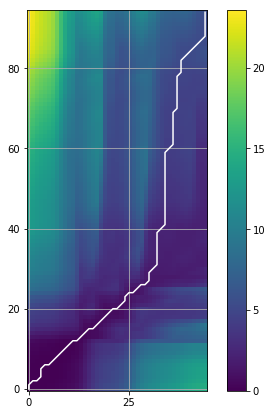

In [5]:
dist, acc, path = dtw.dtw(x, y, dist=lambda x, y: abs(x - y))

plt.figure(figsize=(7, 7))
plt.imshow(acc.T, origin='lower', interpolation='nearest')
plt.colorbar()
plt.plot(path[0], path[1], 'w')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.ylim((-0.5, acc.shape[1]-0.5))
plt.xlim((-0.5, acc.shape[0]-0.5))

plt.savefig("path.png", bbox_inches = "tight", format="png")
plt.show()

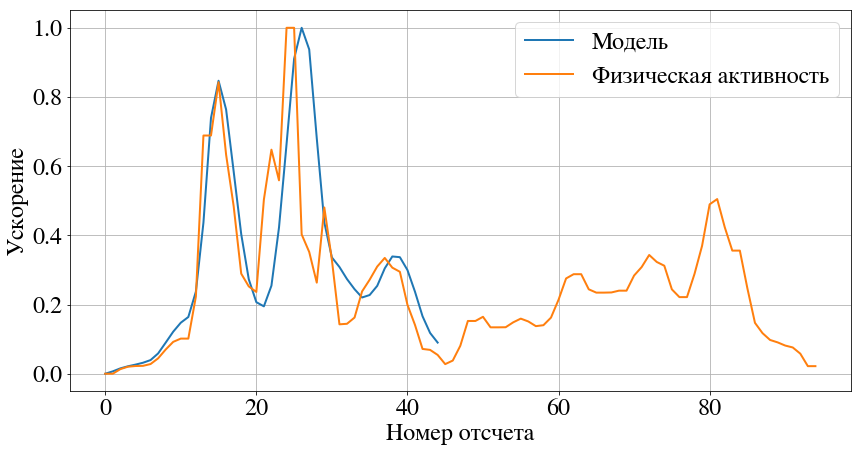

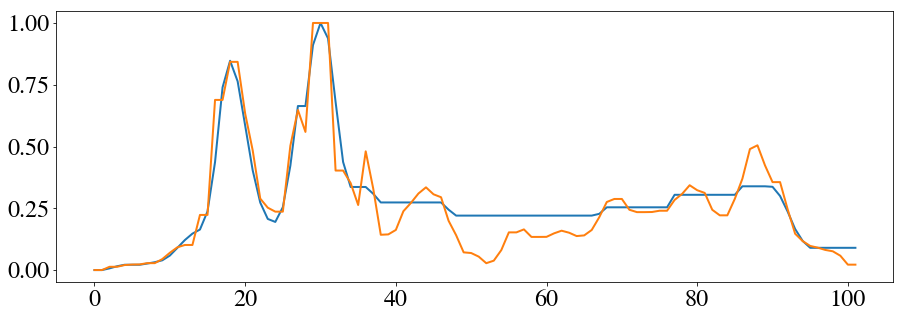

In [6]:
new_x = x.take(path[0])
new_y = y.take(path[1])

plt.figure(figsize=(14, 7))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()
plt.plot(x)
plt.plot(y)
plt.legend(["Модель", "Физическая активность"]) 

plt.xlabel("Номер отсчета")
plt.ylabel("Ускорение")
# plt.savefig("model_segment.png", bbox_inches = "tight", format="png")
plt.figure(figsize=(15, 5))
plt.plot(new_x.values)
plt.plot(new_y.values)
plt.show()

In [7]:
# генетический алгоритм
# параметры: x1, x2, y2
    # рандомное сэмплирование расстояний в заданых точках,
    # и выбираем те, чьи расстояния до кривой меньше
    # выбираем топ n
    # дальше скрещивание мутация
"""
утвержадем, что путь имеет форму:
                         |
                         | (сэмплирование расстояний)
                         |
                         |
                         |(x2, y2)
                        /
                       /
                      /
                     /(сэмплирование расстояний)
                    /
                   / 
                  /
------------------(x1) (сэмплирование расстояний)

"""
# сэмплирвоание расстояний в указаных трех областях точки 
# сэмплирование вне этих областей не производится

'\nутвержадем, что путь имеет форму:\n                         |\n                         | (сэмплирование расстояний)\n                         |\n                         |\n                         |(x2, y2)\n                        /\n                       /\n                      /\n                     /(сэмплирование расстояний)\n                    /\n                   / \n                  /\n------------------(x1) (сэмплирование расстояний)\n\n'